In [8]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import pickle
import re

## 1. Twitter Archive csv

In [9]:
#visual scanning of the twitter archive 
# pd.set_option('display.max_rows', None)
df_tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [10]:
df_tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
sample_tweet = df_tweets_archive.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [6]:
sample_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [7]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

## 2.  Image Predictions file

In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [13]:
print(response)

<Response [200]>


In [14]:
images_filename = url.split('/')[-1]

with open(os.path.join('./', images_filename), mode='wb') as file:
    file.write(response.content)

In [15]:
#read the image predictions tsv file into pandas dataframe
df_img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_img_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [16]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. Additonal data via Twitter API

In [17]:
consumer_key = 'XXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [18]:
tweet_ids = list(df_tweets_archive.tweet_id)
tweet = api.get_status(tweet_ids[0])
#To check the class members (variables and methods) of status object
dir(tweet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'extended_entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [19]:
tweet_ids = list(df_tweets_archive.tweet_id)
tweet_data = {}

for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, tweet_mode='extended')
        tweet_data[str(tweet)] = tweet_status._json
#         favorites = tweet_status.favorite_count
#         retweet_count = tweet_status.retweet_count

#         tweet_list.append({'tweet_id': tweets,
#                         'favorites': favorites,
#                         'retweet_count': retweet_count
#                        })
#         tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: "+ str(tweet))
        



Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096


Rate limit reached. Sleeping for: 241


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 254


In [22]:
tweet_data

{'892420643555336193': {'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h':

In [20]:
with open("tweet_json.txt", 'w') as file:
    json.dump(tweet_data, file)

In [21]:
with open("tweet_json.txt", 'r') as file:
    data = json.load(file)

tweet_list = []

for tweet_id in data.keys():
    favorites = data[tweet_id]['favorite_count']
    retweets = data[tweet_id]['retweet_count']
    tweet_list.append({'tweet_id': tweet_id,
                      'favorite_count': favorites,
                      'retweet_count': retweets})
    
#Created tweets dataframe from df_list (containing list of dictionaries)
tweets_df = pd.DataFrame(tweet_list, columns= ['tweet_id', 'favorite_count', 'retweet_count'])
tweets_df

tweet_id  favorite_count  retweet_count
0     892420643555336193           35861           7595
1     892177421306343426           30933           5626
2     891815181378084864           23282           3721
3     891689557279858688           39115           7764
4     891327558926688256           37360           8370
...                  ...             ...            ...
2326  666049248165822465              96             40
2327  666044226329800704             268            130
2328  666033412701032449             111             41
2329  666029285002620928             120             42
2330  666020888022790149            2388            458

[2331 rows x 3 columns]

## Twitter Data Assessment 

At this point, we have 3 different dataframes:

- df_tweets_archive: Containing the tweets ids, dog popularity ratings and dog categories
- df_img_predictions file: Containing the results of a neural network model to classify dog breeds
- tweets_df: containing the tweets ids with retweet as well as favorite counts for the tweets


In [22]:
df_tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [24]:
sum(df_tweets_archive.tweet_id.duplicated())

0

In [25]:
sum(df_img_predictions.duplicated())

0

In [26]:
#'None' values to be replaced by np.nan
df_tweets_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [27]:
#None values to be replaced with np.nan values for the dog category columns
df_tweets_archive[df_tweets_archive['rating_denominator'] == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [30]:
#Rows with 'rating_denominator' as 0
df_tweets_archive[df_tweets_archive['rating_denominator'] == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [31]:
#Rows with 'rating_denominator' greater than 10 (extreme values)
df_tweets_archive[df_tweets_archive['rating_denominator'] > 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
342            @docmisterio account started on 11/15/15                  NaN   
433   The floofs have been released I repeat the flo...                  NaN   
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behav

In [32]:
#Rows with 'rating_numerator' as 0
df_tweets_archive[df_tweets_archive['rating_numerator'] == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
315   https://twitter.com/dog_rates/status/835152434...                 0   
1016  https://twitter.com/dog_rates/status/746906459...                 0   

      rating_denominator  name doggo floofer pupper puppo  
315                   10  None  None    None   None  None  
1016                  10  None  None    None   None  None

In [33]:
#extreme values in the rating_numerator 
df_tweets_archive[df_tweets_archive['rating_numerator'] > 20]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1712  680494726643068929                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
290   2017-03-04 22:12:52 +0000   
313   2017-02-24 21:54:03 +0000   
340   2017-02-16 13:11:49 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1712  2015-12-25 21:06:00 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1712  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/downloa

In [34]:
df_img_predictions[df_img_predictions['tweet_id'] == 666020888022790149]

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

In [35]:
df_tweets_archive[df_tweets_archive['tweet_id'] == 666020888022790149]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2355                  10  None  None    None   None  None

In [36]:
tweets_df[tweets_df['tweet_id'] == 666020888022790149]

Empty DataFrame
Columns: [tweet_id, favorite_count, retweet_count]
Index: []

In [37]:
df_img_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

## Assessment report

#### Tidiness issues (Structural issues)

##### df_tweets_archive (tweets archive data)
- Majority of the dog category columns are 'None'. Should be replaced with np.nan to indicate missing values.
- Presence of Invalid dog names such as 'a', 'an', 'actually', 'not' which dont make sense for a dog name.
- Timestamp is not in a proper datetime format.
- All dog categories (doggo, floofer, pupper, puppo) can be melted into a single dog category. 
- Change tweet_id datatype from int64 to string object for easy interability and flexibility.

##### df_img_predictions (Image predictions file)
- Reduce number of columns for dog predictions to just 1 column with the most likely dog breed prediction
- Delete columns 'p1', 'p1_conf', 'p2', 'p2_conf', 'p2' after completing step 1 above.
- Change tweet_id datatype from int64 to string object for easy iterability and flexibility.

##### tweets_df (Additional tweet data from twitter API)
- None

#### Quality issues 

##### df_tweets_archive
- Columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' have too many missing values and are hence not necessary for analysis.
- Column 'rating_denominator' has values more than 10 and even some extreme values which should be deleted.
- Column 'rating_denominator' value as zero for some records which should be removed.
- Column 'rating_numerator' has values more than 20 and even some extreme values not fit for analysis. Delete such records.
- Column 'rating_numerator' has value as zero for some records which should be deleted.
- (Deleting such rows will not not affect the entire data but pave way for better and correct insights and data visualisations)

##### df_img_predictions
- There are numerous illogical dog breed names in column p1, p2, p3 namely 'paper_towel','spatula', 'mailbox', 'vacumm' and more. Such records should be eliminated from the dataset.
- There are 3 predictions for dog breed but the best prediction (p1) should suffice for analysis as well as to reduce the dataframe size (before merge) .
- Only confidence levels for 'p1_conf' above 0.5 should be taken into consideration as these figures are more viable.
- Columns like 'jpg_url' and 'img_num' not required for further analysis



## Cleaning Twitter data
### Cleaning twitter archive dataset

In [28]:
#Create copies of the datasets before cleaning 
df_tweets_archive_clean = df_tweets_archive.copy()
tweets_df_clean = tweets_df.copy()
df_img_predictions_clean = df_img_predictions.copy()

In [29]:
#Changing 'tweet_id' datatype from int64 to string object before proceeding
df_tweets_archive_clean.tweet_id = df_tweets_archive_clean.tweet_id.astype(str)
df_img_predictions_clean.tweet_id = df_img_predictions_clean.tweet_id.astype(str)

In [30]:
#Drop unwanted columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'
df_tweets_archive_clean = df_tweets_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)


In [31]:
#Convert timestamp datatype from object to timestamp format
df_tweets_archive_clean['timestamp'] = pd.to_datetime(df_tweets_archive_clean['timestamp'])

### Define: Replace 'None' values to np.nan for dog names and categories

### Code

In [32]:
df_tweets_archive_clean['name'].replace('None', np.nan, inplace=True)
df_tweets_archive_clean['doggo'].replace('None', np.nan, inplace=True)
df_tweets_archive_clean['floofer'].replace('None', np.nan, inplace=True)
df_tweets_archive_clean['pupper'].replace('None', np.nan, inplace=True)
df_tweets_archive_clean['puppo'].replace('None', np.nan, inplace=True)

### Test

In [33]:
df_tweets_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas   NaN     NaN    NaN   NaN  
1                  10     Tilly   NaN     NaN    NaN   NaN  
2                  10    Archie   NaN     NaN    NaN   NaN  
3                  10     Darla   NaN     NaN    NaN   NaN  
4                  10  Franklin   NaN     NaN    NaN   NaN

### Define:  Eliminate rows with invalid dog names such as 'a', 'an', 'actually', 'not', 'just' etc

### Code

In [34]:
df_tweets_archive_clean = df_tweets_archive_clean[(df_tweets_archive_clean['name'] != 'a') & 
                                                  (df_tweets_archive_clean['name'] != 'always') &
                                                  (df_tweets_archive_clean['name'] != 'on') & 
                                                  (df_tweets_archive_clean['name'] != 'not') & 
                                                  (df_tweets_archive_clean['name'] != 'always') & 
                                                  (df_tweets_archive_clean['name'] != 'on') & 
                                                  (df_tweets_archive_clean['name'] != 'not') & 
                                                  (df_tweets_archive_clean['name'] != 'just')]


### Test

In [35]:
df_tweets_archive_clean[df_tweets_archive_clean['name'] == 'a']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [36]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2295 non-null object
timestamp             2295 non-null datetime64[ns, UTC]
source                2295 non-null object
text                  2295 non-null object
rating_numerator      2295 non-null int64
rating_denominator    2295 non-null int64
name                  1550 non-null object
doggo                 95 non-null object
floofer               10 non-null object
pupper                250 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 215.2+ KB


### Define: Eliminate all zero and extreme values from the 'rating_numerator' & 'rating_denominator' columns

### Code

In [37]:
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['rating_numerator'] != 0]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['rating_numerator'] <= 20]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['rating_denominator'] >= 10]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['rating_denominator'] != 0]


### Test

In [38]:
len(df_tweets_archive_clean[df_tweets_archive_clean['rating_numerator'] == 0])

0

In [39]:
len(df_tweets_archive_clean[df_tweets_archive_clean['rating_numerator'] > 20])

0

In [40]:
len(df_tweets_archive_clean[df_tweets_archive_clean['rating_denominator'] < 10])

0

In [41]:
df_tweets_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas   NaN     NaN    NaN   NaN  
1                  10     Tilly   NaN     NaN    NaN   NaN  
2                  10    Archie   NaN     NaN    NaN   NaN  
3                  10     Darla   NaN     NaN    NaN   NaN  
4                  10  Franklin   NaN     NaN    NaN   NaN

### Define: Melt columns 'doggo', 'floofer', 'pupper', 'puppo'

### Code

In [43]:
df_tweets_archive_clean = pd.melt(df_tweets_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator','rating_denominator','name'],
                           value_name='dog_category')

#Drop extra variable column
df_tweets_archive_clean = df_tweets_archive_clean.drop('variable', axis=1)


### Test

In [44]:
df_tweets_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name dog_category  
0                  10   Phineas          NaN  
1                  10     Tilly          NaN  
2                  10    Archie          NaN  
3                  10     Darla          NaN  
4                  10  Franklin          NaN

#### After melting 4 copies of each tweet is created, one for each dog type
### Define: Drop other duplicates except the one with the dog_category name.

### Code





In [45]:
df_tweets_archive_clean = df_tweets_archive_clean.sort_values('dog_category').drop_duplicates('tweet_id', keep = 'first')

### Test

In [46]:
df_tweets_archive_clean.duplicated().sum()

0

**As we can see, there are no duplicates left now for the dog categories**

In [47]:
df_tweets_archive_clean.dog_category.value_counts()

pupper     239
doggo       95
puppo       29
floofer      9
Name: dog_category, dtype: int64

In [48]:
#dog_category counts 
df_tweets_archive_clean


tweet_id                 timestamp  \
9     890240255349198849 2017-07-26 15:59:51+00:00   
874   759793422261743616 2016-07-31 16:50:42+00:00   
866   760521673607086080 2016-08-02 17:04:31+00:00   
862   760893934457552897 2016-08-03 17:43:45+00:00   
842   763956972077010945 2016-08-12 04:35:10+00:00   
...                  ...                       ...   
2264  666063827256086533 2015-11-16 01:22:45+00:00   
2265  666058600524156928 2015-11-16 01:01:59+00:00   
2266  666051853826850816 2015-11-16 00:35:11+00:00   
2267  666049248165822465 2015-11-16 00:24:50+00:00   
2268  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
9     <a href="http://twitter.com/download/iphone" r...   
874   <a href="http://twitter.com/download/iphone" r...   
866   <a href="http://vine.co" rel="nofollow">Vine -...   
862   <a href="http://twitter.com/download/iphone" r...   
842   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2264  <a href="http://twitter.com/download/iphone" r...   
2265  <a href="http://twitter.com/download/iphone" r...   
2266  <a href="http://twitter.com/download/iphone" r...   
2267  <a href="http://twitter.com/download/iphone" r...   
2268  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
9     This is Cassie. She is a college pup. Studying...                14   
874   Meet Maggie &amp; Lila. Maggie is the doggo, L...                12   
866   Doggo want what doggo cannot have. Temptation ...                12   
862   This is Wishes. He has the day off. Daily stru...                11   
842   @TheEllenShow I'm not sure if you know this bu...                12   
...                                                 ...               ...   
2264  This is the happiest dog you will ever see. Ve...                10   
2265  Here is the Rand Paul of retrievers folks! He'...                 8   
2266  This is an odd dog. Hard on the outside but lo...                 2   
2267  Here we have a 1949 1st generation vulpix. Enj...                 5   
2268  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator    name dog_category  
9                     10  Cassie        doggo  
874                   10  Maggie        doggo  
866                   10     NaN        doggo  
862                   10  Wishes        doggo  
842                   10     NaN        doggo  
...                  ...     ...          ...  
2264                  10     the          NaN  
2265                  10     the          NaN  
2266                  10      an          NaN  
2267                  10     NaN          NaN  
2268                  10     NaN          NaN  

[2269 rows x 8 columns]

### Cleaning Image predictions dataset

### Define: Reduce number of columns for dog predictions to just 1 column with the most likely dog breed prediction

### Code

In [49]:
#Initialise 2 empty lists to capture the dog breed and its confidence level data
breed_type = []
confidence_level = []

#Create a function which will iterate through the prediction columns to capture the 
#best prediction of dog breed out all 3 predictions
def breed_confidence_level(row):
    if row['p1_dog'] == True:
        breed_type.append(row['p1'])
        confidence_level.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed_type.append(row['p2'])
        confidence_level.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed_type.append(row['p3'])
        confidence_level.append(row['p3_conf'])
    else:
        breed_type.append('Unknown')
        confidence_level.append(0)
        
#Apply function to image predictions dataframe 
df_img_predictions_clean.apply(breed_confidence_level, axis=1)

#Create 2 new columns for the image predictions dataframe to add the lists
df_img_predictions_clean['breed'] = breed_type
df_img_predictions_clean['confidence_level'] = confidence_level


### Test

In [50]:
df_img_predictions_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  \
0  0.156665    True    Shetland_sheepdog  0.061428    True   
1  0.074192    True  Rhodesian_ridgeback  0.072010    True   
2  0.138584    True           bloodhound  0.116197    True   
3  0.360687    True   miniature_pinscher  0.222752    True   
4  0.243682    True             Doberman  0.154629    True   

                    breed  confidence_level  
0  Welsh_springer_spaniel          0.465074  
1                 redbone          0.506826  
2         German_shepherd          0.596461  
3     Rhodesian_ridgeback          0.408143  
4      miniature_pinscher          0.560311

### Define: Delete columns 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf' as they are no longer required for further analysis

### Code

In [51]:
df_img_predictions_clean = df_img_predictions_clean.drop(['img_num', 'jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)


In [52]:
df_img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id            2075 non-null object
breed               2075 non-null object
confidence_level    2075 non-null float64
dtypes: float64(1), object(2)
memory usage: 48.8+ KB


In [53]:
df_img_predictions_clean.head()

tweet_id                   breed  confidence_level
0  666020888022790149  Welsh_springer_spaniel          0.465074
1  666029285002620928                 redbone          0.506826
2  666033412701032449         German_shepherd          0.596461
3  666044226329800704     Rhodesian_ridgeback          0.408143
4  666049248165822465      miniature_pinscher          0.560311

### Merging all the columns

In [54]:
df_merged_tweets = pd.merge(df_tweets_archive_clean, tweets_df_clean, how='outer', on=['tweet_id'])

In [55]:
df_merged_tweets = pd.merge(df_merged_tweets, df_img_predictions_clean, how='outer', on=['tweet_id'] )

In [56]:
df_merged_tweets

tweet_id                 timestamp  \
0     890240255349198849 2017-07-26 15:59:51+00:00   
1     759793422261743616 2016-07-31 16:50:42+00:00   
2     760521673607086080 2016-08-02 17:04:31+00:00   
3     760893934457552897 2016-08-03 17:43:45+00:00   
4     763956972077010945 2016-08-12 04:35:10+00:00   
...                  ...                       ...   
2351  666055525042405380                       NaT   
2352  666050758794694657                       NaT   
2353  666044226329800704                       NaT   
2354  666033412701032449                       NaT   
2355  666029285002620928                       NaT   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://vine.co" rel="nofollow">Vine -...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351                                                NaN   
2352                                                NaN   
2353                                                NaN   
2354                                                NaN   
2355                                                NaN   

                                                   text  rating_numerator  \
0     This is Cassie. She is a college pup. Studying...              14.0   
1     Meet Maggie &amp; Lila. Maggie is the doggo, L...              12.0   
2     Doggo want what doggo cannot have. Temptation ...              12.0   
3     This is Wishes. He has the day off. Daily stru...              11.0   
4     @TheEllenShow I'm not sure if you know this bu...              12.0   
...                                                 ...               ...   
2351                                                NaN               NaN   
2352                                                NaN               NaN   
2353                                                NaN               NaN   
2354                                                NaN               NaN   
2355                                                NaN               NaN   

      rating_denominator    name dog_category  favorite_count  retweet_count  \
0                   10.0  Cassie        doggo         29584.0         6611.0   
1                   10.0  Maggie        doggo          5930.0         1895.0   
2                   10.0     NaN        doggo          4206.0         1384.0   
3                   10.0  Wishes        doggo          3810.0          970.0   
4                   10.0     NaN        doggo           759.0           54.0   
...                  ...     ...          ...             ...            ...   
2351                 NaN     NaN          NaN           406.0          218.0   
2352                 NaN     NaN          NaN           124.0           51.0   
2353                 NaN     NaN          NaN           268.0          130.0   
2354                 NaN     NaN          NaN           111.0           41.0   
2355                 NaN     NaN          NaN           120.0           42.0   

                     breed  confidence_level  
0                 Pembroke          0.511319  
1         golden_retriever          0.985876  
2                      NaN               NaN  
3         Blenheim_spaniel          0.113992  
4                      NaN               NaN  
...                    ...               ...  
2351                  chow          0.692517  
2352  Bernese_mountain_dog          0.651137  
2353   Rhodesian_ridgeback          0.408143  
2354       German_shepherd          0.596461  
2355               redbone          0.506826  

[2356 rows x 12 columns]

### Define: Rename columns of the merged dataset for more clarity and reproducibility (for future)

### Code

In [57]:
df_merged_tweets = df_merged_tweets.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'breed': 'dog_breed'})



### Final merged Master Dataframe 

In [58]:
df_merged_tweets.head()

tweet_id                tweet_date  \
0  890240255349198849 2017-07-26 15:59:51+00:00   
1  759793422261743616 2016-07-31 16:50:42+00:00   
2  760521673607086080 2016-08-02 17:04:31+00:00   
3  760893934457552897 2016-08-03 17:43:45+00:00   
4  763956972077010945 2016-08-12 04:35:10+00:00   

                                        tweet_source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://vine.co" rel="nofollow">Vine -...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                          tweet_text  dog_score  out_of  \
0  This is Cassie. She is a college pup. Studying...       14.0    10.0   
1  Meet Maggie &amp; Lila. Maggie is the doggo, L...       12.0    10.0   
2  Doggo want what doggo cannot have. Temptation ...       12.0    10.0   
3  This is Wishes. He has the day off. Daily stru...       11.0    10.0   
4  @TheEllenShow I'm not sure if you know this bu...       12.0    10.0   

  dog_name dog_category  favorite_count  retweet_count         dog_breed  \
0   Cassie        doggo         29584.0         6611.0          Pembroke   
1   Maggie        doggo          5930.0         1895.0  golden_retriever   
2      NaN        doggo          4206.0         1384.0               NaN   
3   Wishes        doggo          3810.0          970.0  Blenheim_spaniel   
4      NaN        doggo           759.0           54.0               NaN   

   confidence_level  
0          0.511319  
1          0.985876  
2               NaN  
3          0.113992  
4               NaN

## Twitter Data analysis and Data Visualization 

In [59]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='hsv')

Text(0, 0.5, 'Retweet Count')

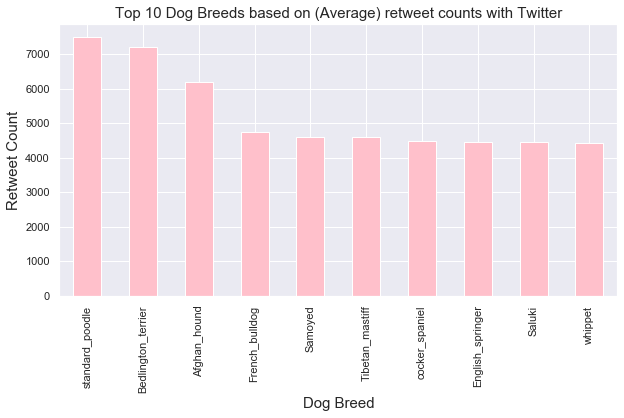

In [60]:
#Top 10 dog breeds based on average retweet counts on twitter
round(df_merged_tweets.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False).head(10)).plot(kind="bar", color="pink", figsize=(10,5))
plt.title('Top 10 Dog Breeds based on (Average) retweet counts with Twitter',fontsize=15)
plt.xlabel('Dog Breed',fontsize=15)
plt.ylabel('Retweet Count',fontsize=15)


- **This bar chart above shows that on an average, Standard poodle tops the charts with being retweeted the maximum times as compared to other dog breeds.**
- **Followed by Golden Retriever, Pembroke, Chihuahua who receive about 100-200 retweets on an average.**
- **Leaving dog breeds of the likes of Pug, Toy Poodle, Chow, Samoyed, Pomeranian as the least retweeted dog breeds on twitter.**


Text(0, 0.5, 'Number of Likes')

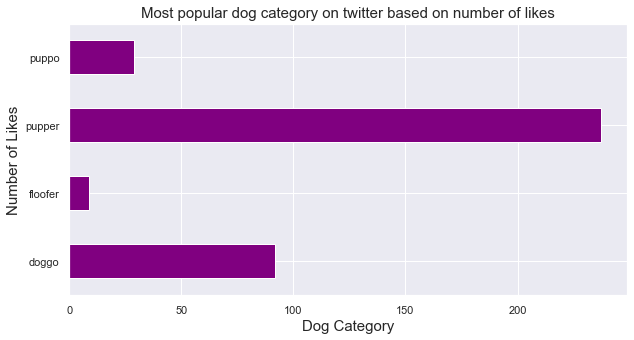

In [61]:
#Most popular dog category on twitter based on numbers of likes or (favorite count) 
df_merged_tweets.groupby('dog_category')['favorite_count'].count().plot(kind="barh", color="purple", figsize=(10,5))
plt.title('Most popular dog category on twitter based on number of likes', fontsize=15)
plt.xlabel('Dog Category',fontsize=15)
plt.ylabel('Number of Likes',fontsize=15)

- **From this bar plot, It is quite evident that the 'pupper' dog category wins with respect to number of likes it receives on twitter with more than 200 likes, followed by Doggo with 80+ likes.**
- **According to the plot,'Floofer' category seems to be the least favorite dog category with only likes ranging from 10-20.**

Text(0, 0.5, 'Number of Likes')

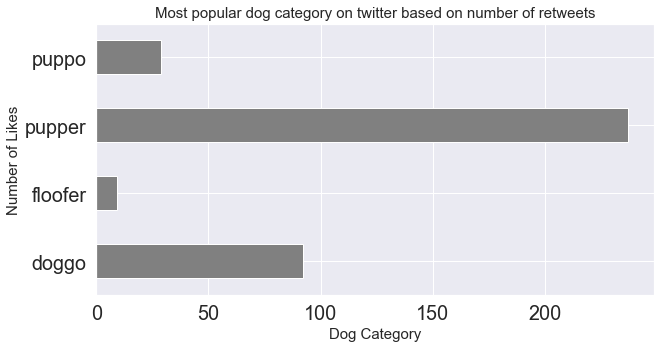

In [578]:
#Most popular dog category on twitter based on number of retweets 
df_merged_tweets.groupby('dog_category')['retweet_count'].count().plot(kind="barh", color="grey",figsize=(10,5))
plt.title('Most popular dog category on twitter based on number of retweets',fontsize=15)
plt.xlabel('Dog Category',fontsize=15)
plt.ylabel('Number of Likes',fontsize=15)

* **According to this bar plot, again the 'pupper' dog category seems to be the most retweeted by the twitterati with more than 200+ retweets, followed by 'doggo' category with about 90 retweets**
* **The 'floofer' again appears to be the lowest retweeted dog category by the twitterati with only about 20 retweets**

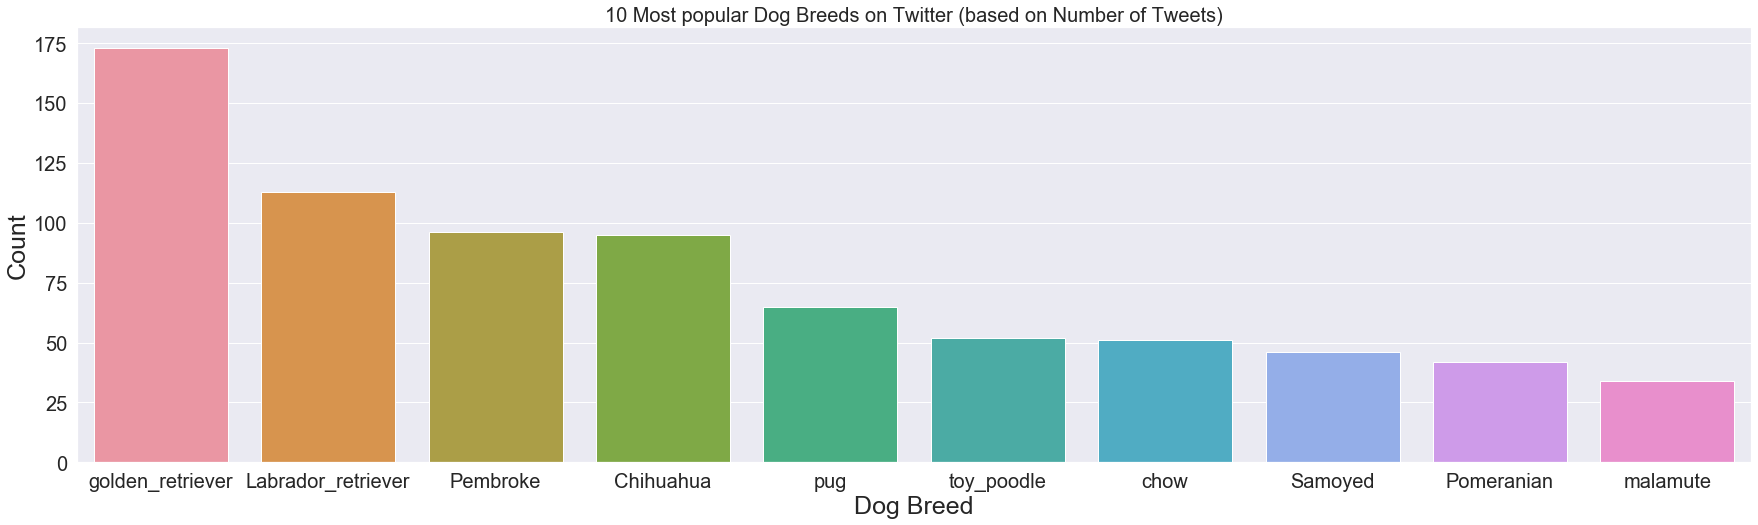

In [127]:
#Top 10 most popular dog breeds based on number of tweets
ax = sns.barplot(x=df_merged_tweets.dog_breed.value_counts().iloc[1:11].index, y=df_merged_tweets.dog_breed.value_counts().iloc[1:11])
fig = plt.gcf()
fig.set_size_inches(30, 8)
ax.set_title("10 Most popular Dog Breeds on Twitter (based on Number of Tweets)",fontsize=20)
ax.set_xlabel('Dog Breed',fontsize=25)
ax.set_ylabel('Count',fontsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=20)


* **Looking at this bar plot, it is quite apparent that the dog lovers on twitter's 'WeRateDogs' handle, love to tweet the most about Golden Retriever followed by Labrador Retriever, Pembroke and Chihuahua.**
* **Pug, Toy poodle, Chow, Samoyed, Pomeranian and Cocker spaniel make it to the lower end of the top 10 most popular dog breeds on 'WeRateDogs' handle.**


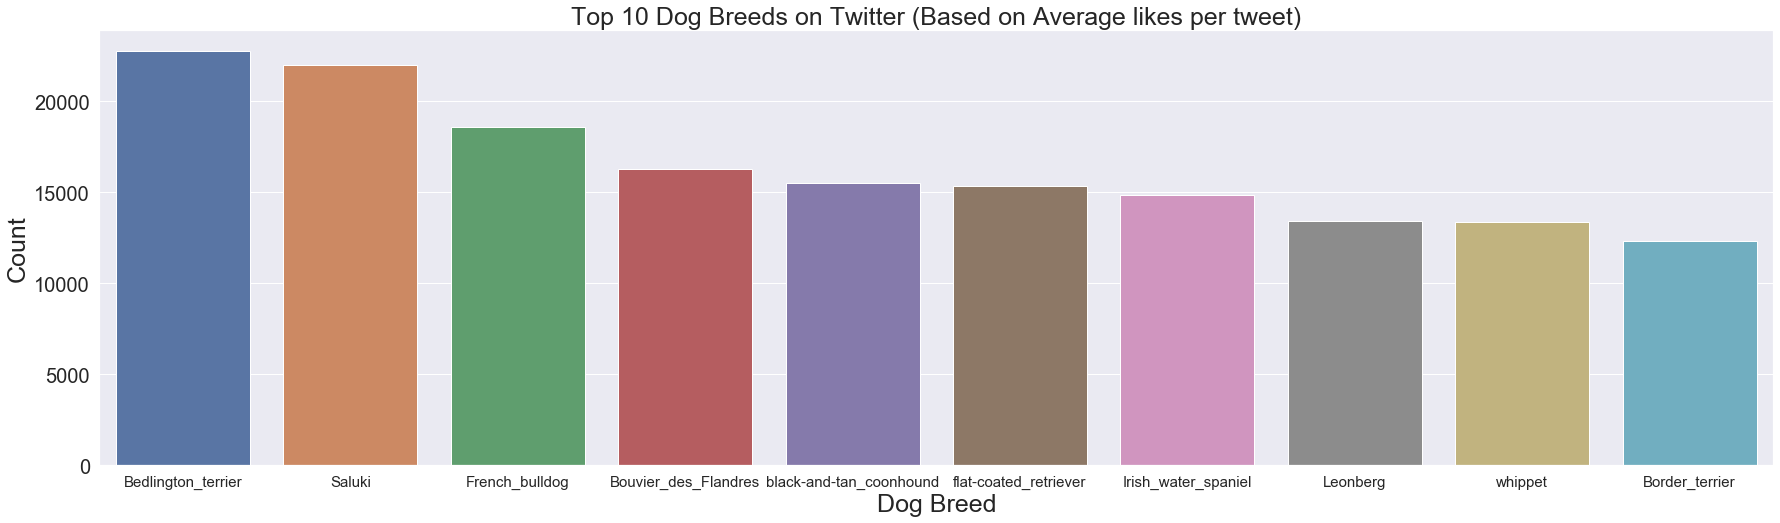

In [157]:
# Top 10 Dog breeds on twitter based on Average likes per tweet
average_likes_per_tweet = round(df_merged_tweets.groupby('dog_breed')['favorite_count'].sum()/df_merged_tweets.groupby('dog_breed')['favorite_count'].count()).sort_values(ascending=False).head(10)

ax = sns.barplot(x= average_likes_per_tweet.index, y= average_likes_per_tweet, palette="deep")
fig = plt.gcf()
fig.set_size_inches(30, 8)
ax.set_title("Top 10 Dog Breeds on Twitter (Based on Average likes per tweet)", fontsize=25)
ax.set_xlabel('Dog Breed',fontsize=25)
ax.set_ylabel('Count',fontsize=25)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=20)


* **From the above bar plot, it appears that the dog breed Bedlington Terrier receives the highest number of likes per tweet for about 2300+ tweets in total which is around 22800 likes (Favorite count).**
* **Subsequently, Saluki seems to be the 2nd highest most liked dog breed per tweet with around 22000 likes.**
* **Leonberg, Whippet and Border Terrier are on the lower end of the plot with only about 12-13K likes per tweet on twitter**

Text(0, 0.5, 'Favorites')

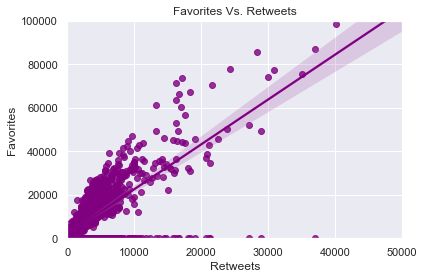

In [96]:
#Scatterplot to view relationship between Favorite_count Vs Retweet_count
sns.regplot(x= df_merged_tweets.retweet_count, y= df_merged_tweets.favorite_count, color='purple')
plt.xlim((0,50000))
plt.ylim((0,100000))
plt.title("Favorites Vs. Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')

* **The scatterplot above seems to exhbit to a strong positive correlation between the retweet counts and the favourite counts. We can assess the situation in a way that a twitter user is most likely to retweet after he/she has liked (clicked favourite) that particular tweet which would clearly indicate that when the favourite count increases, the retweet count is most likely to increase in a positive trend**

In [62]:
#conversion of merged dataset to csv
df_merged_tweets.to_csv('twitter_archive_master.csv')